# Stock Price Prediction using Multiivariate LSTM

This notebook showcases how to predict the closing price of a stock using a multiple features. The model used is **Bidirectional LSTM** which is a type of RNN. The data used is downloaded from the NSE website for the NIFTY-50 companies. The model looks back at 100 days of previous data and gives a prediction for the next day.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout, RepeatVector
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
#from datetime import datetime

In [ ]:
df = pd.read_csv("/content/^NSEI (2).csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,21-01-2013,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0
1,22-01-2013,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0
2,23-01-2013,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0
3,24-01-2013,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0
4,25-01-2013,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0
...,...,...,...,...,...,...,...
1978,28-01-2021,13810.400390,13898.250000,13713.250000,13817.549810,13817.549810,637900.0
1979,29-01-2021,13946.599610,13966.849610,13596.750000,13634.599610,13634.599610,753200.0
1980,01-02-2021,13758.599610,14336.349610,13661.750000,14281.200200,14281.200200,870500.0
1981,02-02-2021,14481.099610,14731.700200,14469.150390,14647.849610,14647.849610,915000.0


In [ ]:
#df = df.reindex(index=df.index[::-1])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-01-2013,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0
1,22-01-2013,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0
2,23-01-2013,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0
3,24-01-2013,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0
4,25-01-2013,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0
...,...,...,...,...,...,...,...
1978,28-01-2021,13810.400390,13898.250000,13713.250000,13817.549810,13817.549810,637900.0
1979,29-01-2021,13946.599610,13966.849610,13596.750000,13634.599610,13634.599610,753200.0
1980,01-02-2021,13758.599610,14336.349610,13661.750000,14281.200200,14281.200200,870500.0
1981,02-02-2021,14481.099610,14731.700200,14469.150390,14647.849610,14647.849610,915000.0


In [ ]:
train_dates=pd.to_datetime(df['Date'])
df=df.drop(["Adj Close"],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,21-01-2013,6085.750000,6094.350098,6065.100098,6082.299805,130900.0
1,22-01-2013,6080.149902,6101.299805,6040.500000,6048.500000,129000.0
2,23-01-2013,6052.850098,6069.799805,6021.149902,6054.299805,137000.0
3,24-01-2013,6046.200195,6065.299805,6007.850098,6019.350098,185200.0
4,25-01-2013,6024.500000,6080.549805,6014.450195,6074.649902,147600.0
...,...,...,...,...,...,...
1978,28-01-2021,13810.400390,13898.250000,13713.250000,13817.549810,637900.0
1979,29-01-2021,13946.599610,13966.849610,13596.750000,13634.599610,753200.0
1980,01-02-2021,13758.599610,14336.349610,13661.750000,14281.200200,870500.0
1981,02-02-2021,14481.099610,14731.700200,14469.150390,14647.849610,915000.0


In [ ]:
df['close'] = df['Close']
df = df.drop('Close', axis=1)
df

,Date,Open,High,Low,Volume,close
0,21-01-2013,6085.750000,6094.350098,6065.100098,130900.0,6082.299805
1,22-01-2013,6080.149902,6101.299805,6040.500000,129000.0,6048.500000
2,23-01-2013,6052.850098,6069.799805,6021.149902,137000.0,6054.299805
3,24-01-2013,6046.200195,6065.299805,6007.850098,185200.0,6019.350098
4,25-01-2013,6024.500000,6080.549805,6014.450195,147600.0,6074.649902
...,...,...,...,...,...,...
1978,28-01-2021,13810.400390,13898.250000,13713.250000,637900.0,13817.549810
1979,29-01-2021,13946.599610,13966.849610,13596.750000,753200.0,13634.599610
1980,01-02-2021,13758.599610,14336.349610,13661.750000,870500.0,14281.200200
1981,02-02-2021,14481.099610,14731.700200,14469.150390,915000.0,14647.849610


In [ ]:

df = df.dropna()
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
close     0
dtype: int64

In [ ]:
cols=list(df)[1:]
cols

['Open', 'High', 'Low', 'Volume', 'close']

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.shape[1]


5

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[0.08951365, 0.08131481, 0.10007614, 0.07228051, 0.08388259],
       [0.0889255 , 0.08204244, 0.09747442, 0.07123136, 0.08032656],
       [0.08605831, 0.07874441, 0.09542794, 0.07564881, 0.08093675],
       ...,
       [0.8953625 , 0.94424755, 0.90350382, 0.48067366, 0.94647526],
       [0.97124379, 0.98564053, 0.98889512, 0.50524572, 0.98504983],
       [1.        , 1.        , 1.        , 0.48012148, 1.        ]])

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1   # Number of days we want to predict into the future
n_past = 100  # Number of past days we want to use to predict the future


In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])   #2nd argument is the index of columns used (0:df_for_training.shape[1])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print('TrainX=',trainX)
print('TrainY=',trainY)

trainX shape == (1867, 100, 5).
trainY shape == (1867, 1).
TrainX= [[[0.08951365 0.08131481 0.10007614 0.07228051 0.08388259]
  [0.0889255  0.08204244 0.09747442 0.07123136 0.08032656]
  [0.08605831 0.07874441 0.09542794 0.07564881 0.08093675]
  ...
  [0.05653549 0.04975314 0.06554525 0.07752623 0.04999502]
  [0.04998187 0.04315186 0.05967552 0.07840972 0.04356678]
  [0.05414091 0.05252768 0.06562984 0.06869133 0.05506603]]

 [[0.0889255  0.08204244 0.09747442 0.07123136 0.08032656]
  [0.08605831 0.07874441 0.09542794 0.07564881 0.08093675]
  [0.0853599  0.07827326 0.09402134 0.10226394 0.07725975]
  ...
  [0.04998187 0.04315186 0.05967552 0.07840972 0.04356678]
  [0.05414091 0.05252768 0.06562984 0.06869133 0.05506603]
  [0.06164499 0.05624451 0.06889257 0.05919382 0.05944795]]

 [[0.08605831 0.07874441 0.09542794 0.07564881 0.08093675]
  [0.0853599  0.07827326 0.09402134 0.10226394 0.07725975]
  [0.08308081 0.07986993 0.09471937 0.08150193 0.08307775]
  ...
  [0.05414091 0.05252768 0

In [ ]:
model = Sequential()
model.add(LSTM(50 ,input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
print(model.summary())
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.1, verbose=1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           11200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 100)          60400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 232,501
Trainable params: 232,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
27/27 [==============================] - 6s 77ms/step - loss: 0.0562 - val_loss: 0.0046
Epoch 2/1

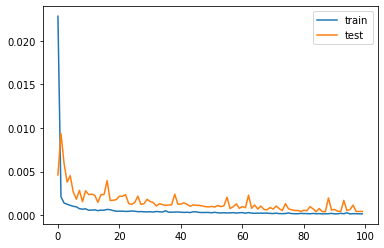

In [ ]:
# Plot of the training and validation loss 
import matplotlib.pyplot as pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future=1 #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

In [ ]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
#Prediction for the next day
y_pred_future = y_pred_future[::-1]
y_pred_future

array([14367.856], dtype=float32)

In [ ]:
## %Difference in the predicted value
prediction = y_pred_future[0]
print('Predicted value for next day=',prediction)
b = df['close'].iloc[-1]
print('last close price=',b)
percentage = ((prediction-b)/b)*100
print('percentage change should be =', percentage.round(3),'%' )

Predicted value for next day= 14367.856
last close price= 14789.9502
percentage change should be = -2.854 %


In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])